# Task 1

In [4]:
# Import libraries
import requests
import pandas as pd
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [5]:
r = requests.get('https://www.topuniversities.com/sites/default/files/qs-rankings-data/357051_indicators.txt')
''' Note that this list is the top 200 only if the whole list is sorted
    This check is done at the end, after the dataframe has been created (see below).
    Moreover, this code would work for any 'top k' '''  
data = r.json()['data'][:200]

In [6]:
df = pd.DataFrame(columns=['Rank', 'Country', 'Region', 'Total Faculty Members',
                           'International Faculty Members', 'Total Students', 
                           'International Students'])
df.index.name = 'Name'

'''Get a single number from the details webpage. ClassName is the information on the webpage
   to be returned.'''
def getCount(details, className):
        attr = BeautifulSoup(details.text, 'html.parser').find('div', class_=className)
        if attr is None:
            print ("No attribute '", className, "' found")
            return None
        return int(attr.find('div', class_="number").text.strip().replace(',', ''))

'Dataframe generation'    
for d in data:
    soup = BeautifulSoup(d['uni'], 'html.parser')
    details = requests.get("https://www.topuniversities.com" + soup.a.get('href'))
    index = soup.a.text.strip()
    print("Processing", d['overall_rank'], ":", index)
    df.loc[index] = [int(d['overall_rank']), d['location'], d['region'], 
                     getCount(details, 'total faculty'), 
                     getCount(details, 'inter faculty'),
                     getCount(details, 'total student'),
                     getCount(details, 'total inter')]

Processing 1 : Massachusetts Institute of Technology (MIT)
Processing 2 : Stanford University
Processing 3 : Harvard University
Processing 4 : California Institute of Technology (Caltech)
Processing 5 : University of Cambridge
Processing 6 : University of Oxford
Processing 7 : UCL (University College London)
Processing 8 : Imperial College London
Processing 9 : University of Chicago
Processing 10 : ETH Zurich - Swiss Federal Institute of Technology
Processing 11 : Nanyang Technological University, Singapore (NTU)
Processing 12 : Ecole Polytechnique Fédérale de Lausanne (EPFL)
Processing 13 : Princeton University
Processing 14 : Cornell University
Processing 15 : National University of Singapore (NUS)
Processing 16 : Yale University
Processing 17 : Johns Hopkins University
Processing 18 : Columbia University
Processing 19 : University of Pennsylvania
Processing 20 : The Australian National University
Processing 21 : Duke University
Processing 21 : University of Michigan
Processing 23 : 

Processing 182 : Universidade Estadual de Campinas (Unicamp)
Processing 182 : University of Colorado Boulder
Processing 182 : Vrije Universiteit Brussel (VUB)
Processing 186 : University of Rochester
Processing 187 : Universidad Autónoma de Madrid
Processing 188 : Alma Mater Studiorum - University of Bologna
Processing 188 : University of Reading
Processing 190 : Indian Institute of Science (IISc) Bangalore
No attribute ' inter faculty ' found
Processing 191 : University of Cape Town
Processing 192 : Keio University CEMS MIM
Processing 192 : Scuola Normale Superiore di Pisa
Processing 192 : Scuola Superiore Sant'Anna Pisa di Studi Universitari e di Perfezionamento
Processing 195 : Stockholm University
Processing 281 : Technische Universität Dresden
Processing 195 : Texas A&M University
Processing 195 : Universitat Autònoma de Barcelona
Processing 199 : Instituto Tecnológico y de Estudios Superiores de Monterrey
Processing 200 : Maastricht University


In [7]:
df.index.is_unique

True

In [8]:
'Check that the dataframe has the correct length'
len(df)

200

In [9]:
'Now we can check for rank correctness'
# There is no built-in method
def checkSorted(df):
    col = df['Rank']
    for i in range(len(col) - 1):
        if col[i + 1] < col[i] or col[i] > len(col):
            print("The list is not correct:")
            print(df.iloc[i], "\n")
            print(df.iloc[i + 1])
            return False
    return col[len(col) - 1] <= len(col)

checkSorted(df)

The list is not correct:
Rank                                 281
Country                          Germany
Region                            Europe
Total Faculty Members               4913
International Faculty Members        669
Total Students                     34029
International Students              4929
Name: Technische Universität Dresden, dtype: object 

Rank                                       195
Country                          United States
Region                           North America
Total Faculty Members                     3446
International Faculty Members              206
Total Students                           60294
International Students                    4900
Name: Texas A&M University, dtype: object


False

In [10]:
 ''' As of 20/10/2017, in the potential 'top 200' the University of Dresden has rank 281.
 However, we suspect it is wrong: there is no university with rank 198 (there are 3 universities with 
 rank 195 and one with 199) and there are two universities with rank 281, including the University of Dresden.
 However, rank 282 is filled and all the ranks afterwards are correct. This leads us to believe that one of the 
 two universities with rank 281 should have rank 198 or 195. Since the University of Dresden is indexed among 
 the universities of rank 195, the simplest way to restore ordering in the university list is to assign rank 195
 to the university of Dresden.'''

df.loc['Technische Universität Dresden', 'Rank'] = 195
checkSorted(df)

True

In [11]:
df

,Rank,Country,Region,Total Faculty Members,International Faculty Members,Total Students,International Students
Name,,,,,,,
Massachusetts Institute of Technology (MIT),1,United States,North America,2982,1679,11067,3717
Stanford University,2,United States,North America,4285,2042,15878,3611
Harvard University,3,United States,North America,4350,1311,22429,5266
California Institute of Technology (Caltech),4,United States,North America,953,350,2255,647
University of Cambridge,5,United Kingdom,Europe,5490,2278,18770,6699
University of Oxford,6,United Kingdom,Europe,6750,2964,19720,7353
UCL (University College London),7,United Kingdom,Europe,6345,2554,31080,14854
Imperial College London,8,United Kingdom,Europe,3930,2071,16090,8746
University of Chicago,9,United States,North America,2449,635,13557,3379


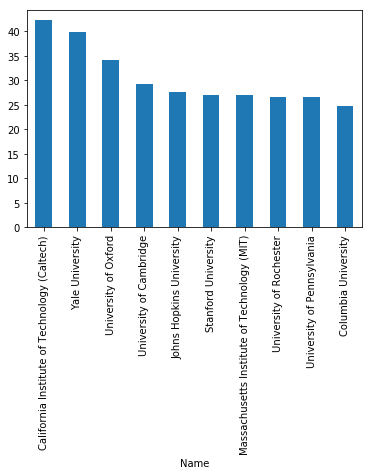

In [12]:
# Best universities by ratio of faculty members / students

def bestRatios(ratios):
    ratios = ratios.sort_values(ascending=False)
    return (ratios * 100)[:10].plot(kind='bar', )

bestRatios(df['Total Faculty Members'] / df['Total Students'])

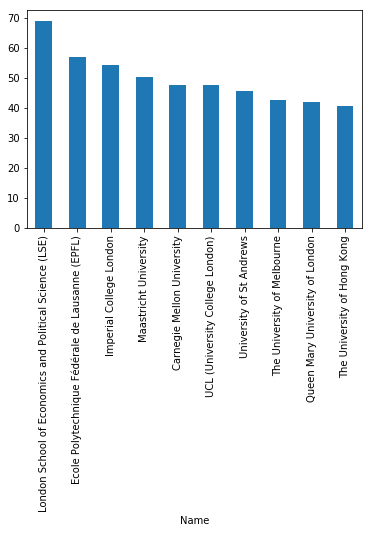

In [13]:
# Best universities by ratio of international students
bestRatios(df['International Students'] / df['Total Students'])

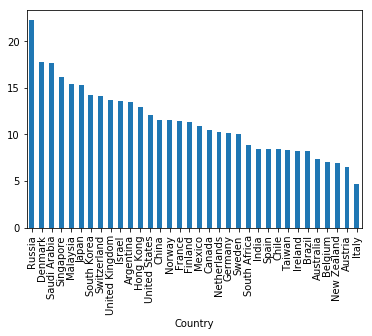

In [14]:
# Best university groups according to the ratio of 2 given attributes 
def groupRatios(df, column, numerator, denominator):
    groups = df.groupby(column)
    res = (groups[numerator].sum() / groups[denominator].sum()).sort_values(ascending=False) * 100
    return res.plot(kind='bar')

groupRatios(df, 'Country', 'Total Faculty Members', 'Total Students')

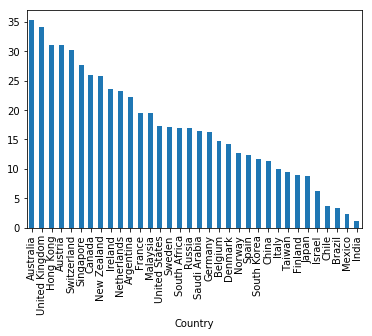

In [15]:
groupRatios(df, 'Country', 'International Students', 'Total Students')

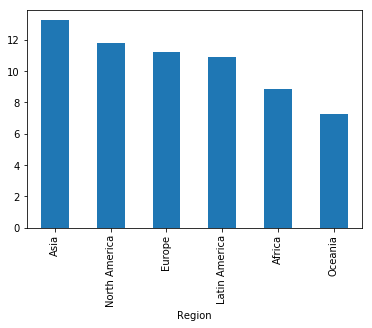

In [16]:
groupRatios(df, 'Region', 'Total Faculty Members', 'Total Students')

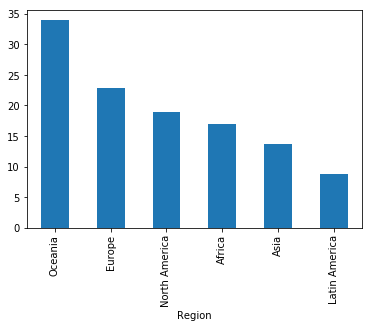

In [17]:
groupRatios(df, 'Region', 'International Students', 'Total Students')

# Task 2

In [18]:
r2 = requests.get('https://www.timeshighereducation.com/sites/default/files/the_data_rankings/world_university_rankings_2018_limit0_369a9045a203e176392b9fb8f8c1cb2a.json')
''' Note that this list is the top 200 only if the whole list is sorted
    This check is done at the end, after the dataframe has been created (see below).
    Moreover, this code would work for any 'top k' '''  
data2 = r2.json()['data'][:200]

In [20]:
df2 = pd.DataFrame(columns=['Rank', 'Country', 'Total Faculty Members',
                           'International Faculty Members', 'Total Students', 
                           'International Students', 'Ratio Faculty to Student', 'Ratio Intl Students'])
df2.index.name = 'Name'

'Dataframe generation'    
for d in data2:
    index = d['name']
    rank = int(d['rank'].strip("="))
    print("Processing", rank, ":", index)
    num_students = int(d['stats_number_students'].replace(",", ""))
    num_faculty = round(num_students / float(d['stats_student_staff_ratio']))
    ratio_faculty_student= 1 / float(d['stats_student_staff_ratio'])    
    ratio_intl_student = float(d['stats_pc_intl_students'].strip("%")) / 100
    num_intl_students = round(ratio_intl_student * num_students)
    df2.loc[index] = [rank, d['location'], num_faculty, 
                      '?', num_students, num_intl_students, 
                      ratio_faculty_student, ratio_intl_student]

Processing 1 : University of Oxford
Processing 2 : University of Cambridge
Processing 3 : California Institute of Technology
Processing 3 : Stanford University
Processing 5 : Massachusetts Institute of Technology
Processing 6 : Harvard University
Processing 7 : Princeton University
Processing 8 : Imperial College London
Processing 9 : University of Chicago
Processing 10 : ETH Zurich – Swiss Federal Institute of Technology Zurich
Processing 10 : University of Pennsylvania
Processing 12 : Yale University
Processing 13 : Johns Hopkins University
Processing 14 : Columbia University
Processing 15 : University of California, Los Angeles
Processing 16 : University College London
Processing 17 : Duke University
Processing 18 : University of California, Berkeley
Processing 19 : Cornell University
Processing 20 : Northwestern University
Processing 21 : University of Michigan
Processing 22 : National University of Singapore
Processing 22 : University of Toronto
Processing 24 : Carnegie Mellon Uni

In [21]:
# filling up regions with previous dataset for future use
regions = df[['Country', 'Region']].drop_duplicates()
df2 = df2.reset_index().merge(regions, on='Country', how='left').set_index('Name')

In [22]:
df2

,Rank,Country,Total Faculty Members,International Faculty Members,Total Students,International Students,Ratio Faculty to Student,Ratio Intl Students,Region
Name,,,,,,,,,
University of Oxford,1,United Kingdom,1822,?,20409,7755,0.089286,0.38,Europe
University of Cambridge,2,United Kingdom,1687,?,18389,6436,0.091743,0.35,Europe
California Institute of Technology,3,United States,340,?,2209,596,0.153846,0.27,North America
Stanford University,3,United States,2113,?,15845,3486,0.133333,0.22,North America
Massachusetts Institute of Technology,5,United States,1285,?,11177,3800,0.114943,0.34,North America
Harvard University,6,United States,2284,?,20326,5285,0.112360,0.26,North America
Princeton University,7,United States,958,?,7955,1909,0.120482,0.24,North America
Imperial College London,8,United Kingdom,1391,?,15857,8721,0.087719,0.55,Europe
University of Chicago,9,United States,2181,?,13525,3381,0.161290,0.25,North America


In [23]:
checkSorted(df2)

True

In [24]:
df2.index.is_unique

True

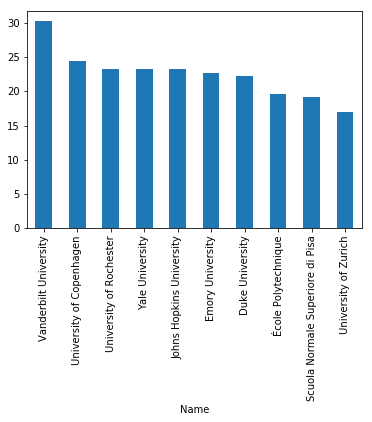

In [25]:
bestRatios(df2['Ratio Faculty to Student'])

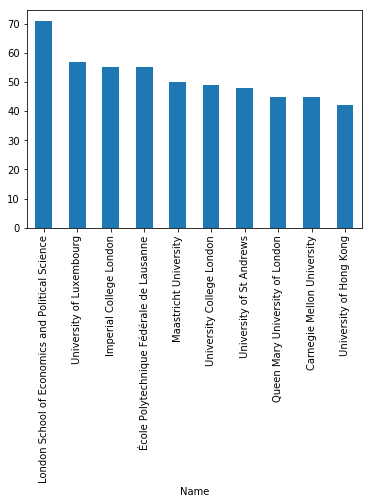

In [26]:
# Best universities by ratio of international students
bestRatios(df2['Ratio Intl Students'])

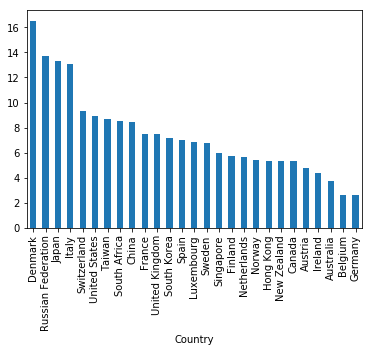

In [27]:
groupRatios(df2, 'Country', 'Total Faculty Members', 'Total Students')

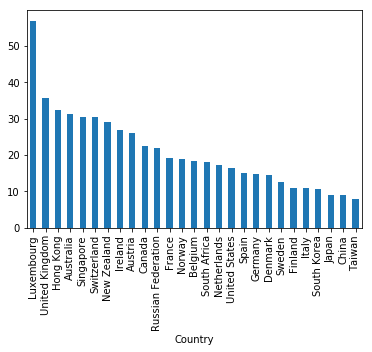

In [28]:
groupRatios(df2, 'Country', 'International Students', 'Total Students')

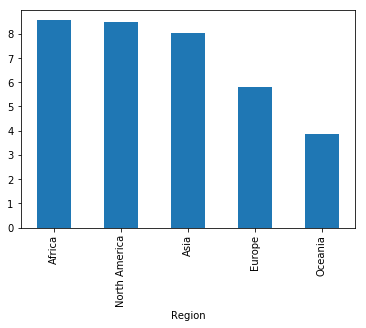

In [29]:
groupRatios(df2, 'Region', 'Total Faculty Members', 'Total Students')

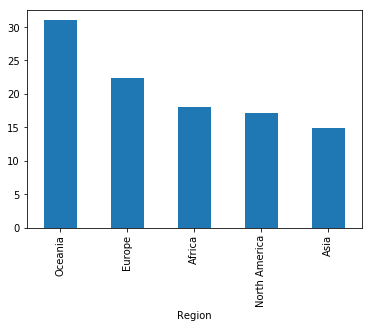

In [30]:
groupRatios(df2, 'Region', 'International Students', 'Total Students')

<h1>Task 3</h1>

Merge the two DataFrames created in questions 1 and 2 using university names. 
Match universities' names as well as you can, and explain your strategy. 
Keep track of the original position in both rankings.

<h2>Strategy</h2>
the biggest concern in matching university names is that the original name and the english translation are not used consistenlty: the first website tend to use more frequently the original name, while the second use often the english version. Our approach is to use wikipedia to normalize / translate foreign university names. At first, we would navigate through the university page in the foreign language with the aim of retriving the English page link. However, this required two 'gets' requests, resulting in bad performance. Luckily, querying the english webserver of wikipedia will return the english webpage regardless of the language of the query, thus only one get request is needed. Finally, the header of the page is sufficient to retrieve the English "translation".
However, there are many cases where wikipedia fails to match the query to any English page. For this reason the next step is to pre-process, i.e. to apply standard data mining technique to improve text matching. The third and last step is to go through the universities by country and assess the quality of the matching. We found 9 edge cases overall and decided to fix them manually. Note that the final result is the perfect match of the two websites.

In [31]:
def to_english(unis):
    i = 0
    for uni in unis:
        url = 'https://en.wikipedia.org/wiki/' + uni
        soup = BeautifulSoup(requests.get(url).text, "html.parser")
        eng = soup.h1.text
        unis[i] = eng
        print(uni, "->", eng)
        i += 1
    return unis

eng = to_english(df.reset_index()['Name'])
eng2 = to_english(df2.reset_index()['Name'])

Massachusetts Institute of Technology (MIT) -> Massachusetts Institute of Technology (MIT)
Stanford University -> Stanford University
Harvard University -> Harvard University
California Institute of Technology (Caltech) -> California Institute of Technology (Caltech)
University of Cambridge -> University of Cambridge
University of Oxford -> University of Oxford
UCL (University College London) -> UCL (University College London)
Imperial College London -> Imperial College London
University of Chicago -> University of Chicago
ETH Zurich - Swiss Federal Institute of Technology -> ETH Zurich - Swiss Federal Institute of Technology
Nanyang Technological University, Singapore (NTU) -> Nanyang Technological University, Singapore (NTU)
Ecole Polytechnique Fédérale de Lausanne (EPFL) -> Ecole Polytechnique Fédérale de Lausanne (EPFL)
Princeton University -> Princeton University
Cornell University -> Cornell University
National University of Singapore (NUS) -> National University of Singapore (NU

McMaster University -> McMaster University
RWTH Aachen University -> RWTH Aachen University
University of Oslo -> University of Oslo
University of Pittsburgh -> University of Pittsburgh
Technische Universität Berlin (TU Berlin) -> Technische Universität Berlin (TU Berlin)
The Hebrew University of Jerusalem -> Hebrew University of Jerusalem
University of Lausanne -> University of Lausanne
Emory University -> Emory University
Erasmus University Rotterdam -> Erasmus University Rotterdam
Michigan State University -> Michigan State University
University of Basel -> University of Basel
University of Otago -> University of Otago
University of Waterloo -> University of Waterloo
Université catholique de Louvain (UCL) -> Université catholique de Louvain (UCL)
University of Vienna -> University of Vienna
Hanyang University -> Hanyang University
Universitat de Barcelona -> University of Barcelona
École Normale Supérieure de Lyon -> École normale supérieure de Lyon
University of Aberdeen -> Univers

Monash University -> Monash University
University of Freiburg -> University of Freiburg
University of Groningen -> University of Groningen
Michigan State University -> Michigan State University
University of New South Wales -> University of New South Wales
Rice University -> Rice University
Uppsala University -> Uppsala University
Free University of Berlin -> Free University of Berlin
Dartmouth College -> Dartmouth College
University of Helsinki -> University of Helsinki
University of Warwick -> University of Warwick
Technical University of Berlin -> Technical University of Berlin
Lund University -> Lund University
University of Tübingen -> University of Tübingen
University of Basel -> University of Basel
Korea Advanced Institute of Science and Technology (KAIST) -> Korea Advanced Institute of Science and Technology (KAIST)
Durham University -> Durham University
Emory University -> Emory University
University of California, Irvine -> University of California, Irvine
University of Bonn 

In [68]:
import unicodedata

def preProcess(ind):
    # to lower case
    ind = ind.str.lower()
    # strip brackets and their content
    ind = ind.str.replace(r"\(.*\)","")
    # strip punctuation
    ind = ind.str.replace('[^\w\s]','')
    # stem the words 'university | universitat | universität...'
    ind = ind.str.replace('univers[^ ]*', 'univers')
    # germany specific pre-processing
    ind = ind.str.replace('(technische|technical) univers', 'tu')
    # strip typical stopwords
    pat = r'\b(?:{})\b'.format('|'.join(['the', 'of']))
    ind = ind.str.replace(pat, '')
    # strip multiple whitespaces
    ind = ind.str.strip().str.replace(' +', ' ')
    # get rid of accents
    ind = ind.map(lambda x: unicodedata.normalize('NFD', x).encode('ascii', 'ignore'))
    return ind

keys = preProcess(eng)
keys2 = preProcess(eng2)
keys.index = df.index
df['Key'] = keys
keys2.index = df2.index
df2['Key'] = keys2

In [74]:
# Fixing edge cases, when the get request to wikipedia fails
df.loc['KIT, Karlsruhe Institute of Technology', "Key"] = "karlsruhe institute technology".encode()
df.loc['Université Pierre et Marie Curie (UPMC)', "Key"] = "pierre and marie curie univers".encode()
df.loc['Trinity College Dublin, The University of Dublin', "Key"] = "trinity college dublin".encode()
df.loc['Scuola Superiore Sant\'Anna Pisa di Studi Universitari e di Perfezionamento', "Key"] = "scuola superiore santanna".encode()
df.loc['Nanyang Technological University, Singapore (NTU)', "Key"] = "nanyang technological univers".encode()
df.loc['KAIST - Korea Advanced Institute of Science & Technology', "Key"] = "korea advanced institute science and technology".encode()
df2.loc['University College London', "Key"] = "ucl".encode()
df2.loc['Wageningen University & Research', "Key"] = "wageningen univers and research centre".encode()
df2.loc['ETH Zurich – Swiss Federal Institute of Technology Zurich', "Key"] = "eth zurich swiss federal institute technology".encode()
# Merging the dataframes
df3 = df.reset_index().merge(df2.reset_index(), on='Key', how='outer').set_index('Key')
# Merge fields
df3['Country'] = df3['Country_x'].fillna(df3['Country_y'])
df3['Region'] = df3['Region_x'].fillna(df3['Region_y'])
df3 = df3.drop(['Country_x', 'Country_y', 'Region_x', 'Region_y'], 1)

In [75]:
# Code used to determine the edge cases
# Find the list of not matched universities
todo = df3[(pd.isnull(df3['Rank_x'])) | (pd.isnull(df3['Rank_y'])) ]
todo.groupby('Country').size()

Country
Argentina          1
Australia          1
Austria            1
Belgium            2
Brazil             2
Canada             1
Chile              1
France             5
Germany            8
India              3
Ireland            1
Israel             1
Italy              2
Japan              7
Luxembourg         1
Malaysia           1
Mexico             2
Netherlands        3
New Zealand        1
Norway             1
Saudi Arabia       1
South Korea        3
Spain              3
Sweden             3
Taiwan             1
United Kingdom     7
United States     15
dtype: int64

In [77]:
# I checked all countries one by one to make sure no other matches are possible 
# Here is an example:
todo[todo['Country'] == 'Germany']

,Name_x,Rank_x,Total Faculty Members_x,International Faculty Members_x,Total Students_x,International Students_x,Name_y,Rank_y,Total Faculty Members_y,International Faculty Members_y,Total Students_y,International Students_y,Ratio Faculty to Student,Ratio Intl Students,Country,Region
Key,,,,,,,,,,,,,,,,
b'univers bonn',NaN,NaN,NaN,NaN,NaN,NaN,University of Bonn,100,457,?,35619,4630,0.012837,0.13,Germany,Europe
b'univers mannheim',NaN,NaN,NaN,NaN,NaN,NaN,University of Mannheim,125,148,?,10995,1759,0.013423,0.16,Germany,Europe
b'charite',NaN,NaN,NaN,NaN,NaN,NaN,Charité - Universitätsmedizin Berlin,126,419,?,6792,1223,0.061728,0.18,Germany,Europe
b'univers cologne',NaN,NaN,NaN,NaN,NaN,NaN,University of Cologne,145,886,?,45087,4509,0.019646,0.10,Germany,Europe
b'univers ulm',NaN,NaN,NaN,NaN,NaN,NaN,Ulm University,155,375,?,10657,1385,0.035211,0.13,Germany,Europe
b'univers erlangennuremberg',NaN,NaN,NaN,NaN,NaN,NaN,University of Erlangen-Nuremberg,162,662,?,38730,4648,0.017094,0.12,Germany,Europe
b'univers wurzburg',NaN,NaN,NaN,NaN,NaN,NaN,University of Würzburg,165,665,?,22537,2028,0.029499,0.09,Germany,Europe
b'univers munster',NaN,NaN,NaN,NaN,NaN,NaN,University of Münster,173,993,?,42287,2960,0.023474,0.07,Germany,Europe


In [755]:
# We can now get rid of unmatchable cases...
df4 = df3[(pd.notnull(df3['Rank_x'])) & (pd.notnull(df3['Rank_y']))]
# ...and merge the indexes
df4.index = df4["Name_y"]
df4.index.name = "Name"
df4 = df4.drop(["Name_x", "Name_y"], axis=1)
df4

,Rank_x,Total Faculty Members_x,International Faculty Members_x,Total Students_x,International Students_x,Rank_y,Total Faculty Members_y,International Faculty Members_y,Total Students_y,International Students_y,Ratio Faculty to Student,Ratio Intl Students,Country,Region
Name,,,,,,,,,,,,,,
Massachusetts Institute of Technology,1,2982,1679,11067,3717,5,1285,?,11177,3800,0.114943,0.34,United States,North America
Stanford University,2,4285,2042,15878,3611,3,2113,?,15845,3486,0.133333,0.22,United States,North America
Harvard University,3,4350,1311,22429,5266,6,2284,?,20326,5285,0.112360,0.26,United States,North America
California Institute of Technology,4,953,350,2255,647,3,340,?,2209,596,0.153846,0.27,United States,North America
University of Cambridge,5,5490,2278,18770,6699,2,1687,?,18389,6436,0.091743,0.35,United Kingdom,Europe
University of Oxford,6,6750,2964,19720,7353,1,1822,?,20409,7755,0.089286,0.38,United Kingdom,Europe
University College London,7,6345,2554,31080,14854,16,2886,?,30304,14849,0.095238,0.49,United Kingdom,Europe
Imperial College London,8,3930,2071,16090,8746,8,1391,?,15857,8721,0.087719,0.55,United Kingdom,Europe
University of Chicago,9,2449,635,13557,3379,9,2181,?,13525,3381,0.161290,0.25,United States,North America
